In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split


import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot

In [3]:
data=pd.read_csv("/content/drive/MyDrive/customer revenue/online_shoppers_intention.csv")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
data.shape

(12330, 18)

In [7]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [8]:
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

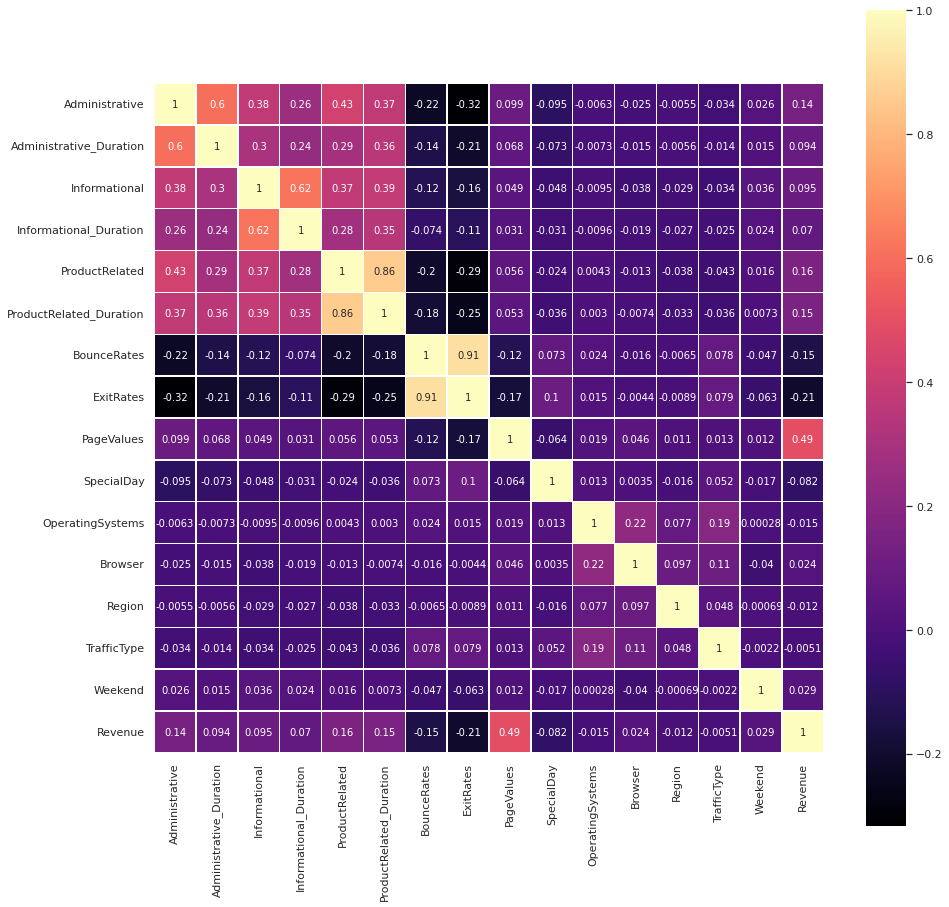

In [9]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True,square=True,cmap="magma",linewidths=.5)

In [10]:
data=data.drop(["Administrative","Informational","ProductRelated_Duration"],axis=1)

In [11]:
data.head()

,Administrative_Duration,Informational_Duration,ProductRelated,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,1,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,2,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,0.0,1,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,2,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,10,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [12]:
values=data["Month"].value_counts().values
labels=data["Month"].value_counts().index
color=data["Month"].index
fig=go.Figure(go.Pie(labels=labels,values=values,textinfo="label+percent",marker=dict(colors=color)))
fig.show()

In [13]:
values=data["VisitorType"].value_counts().values
labels=data["VisitorType"].value_counts().index
color=data["VisitorType"].index
fig=go.Figure(go.Pie(labels=labels,values=values,textinfo="label+percent",marker=dict(colors=color)))
fig.show()

In [14]:
values=data["Weekend"].value_counts().values
labels=data["Weekend"].value_counts().index
color=data["Weekend"].index
fig=go.Figure(go.Pie(labels=labels,values=values,textinfo="label+percent",marker=dict(colors=color)))
fig.show()

In [15]:
values=data["Revenue"].value_counts().values
labels=data["Revenue"].value_counts().index
color=data["Revenue"].index
fig=go.Figure(go.Pie(labels=labels,values=values,textinfo="label+percent",marker=dict(colors=color)))
fig.show()

In [16]:
values=data["OperatingSystems"].value_counts().values
labels=data["OperatingSystems"].value_counts().index
color=data["OperatingSystems"].index
fig=go.Figure(go.Pie(labels=labels,values=values,textinfo="label+percent",marker=dict(colors=color)))
fig.show()

In [17]:
values=data["Browser"].value_counts().values
labels=data["Browser"].value_counts().index
color=data["Browser"].index
fig=go.Figure(go.Pie(labels=labels,values=values,textinfo="label+percent",marker=dict(colors=color)))
fig.show()

In [18]:
values=data["Region"].value_counts().values
labels=data["Region"].value_counts().index
color=data["Region"].index
fig=go.Figure(go.Pie(labels=labels,values=values,textinfo="label+percent",marker=dict(colors=color)))
fig.show()

In [19]:
visitor=pd.get_dummies(data["VisitorType"])

x=pd.concat([data,visitor],axis=1)
x.head()

,Administrative_Duration,Informational_Duration,ProductRelated,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,New_Visitor,Other,Returning_Visitor
0,0.0,0.0,1,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False,0,0,1
1,0.0,0.0,2,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False,0,0,1
2,0.0,0.0,1,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False,0,0,1
3,0.0,0.0,2,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False,0,0,1
4,0.0,0.0,10,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False,0,0,1


In [20]:
x.columns

Index(['Administrative_Duration', 'Informational_Duration', 'ProductRelated',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue', 'New_Visitor', 'Other', 'Returning_Visitor'],
      dtype='object')

In [21]:
y=x["Revenue"]
final_x=x.drop(["Revenue","Month","VisitorType"],axis=1)

In [22]:
final_x["Weekend"]=np.asarray(final_x["Weekend"]).astype(np.float32)
y=np.asarray(y).astype(np.float32)

In [23]:
y.shape

(12330,)

In [24]:
final_x.shape

(12330, 15)

In [25]:
final_x

,Administrative_Duration,Informational_Duration,ProductRelated,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,New_Visitor,Other,Returning_Visitor
0,0.0,0.0,1,0.200000,0.200000,0.000000,0.0,1,1,1,1,0.0,0,0,1
1,0.0,0.0,2,0.000000,0.100000,0.000000,0.0,2,2,1,2,0.0,0,0,1
2,0.0,0.0,1,0.200000,0.200000,0.000000,0.0,4,1,9,3,0.0,0,0,1
3,0.0,0.0,2,0.050000,0.140000,0.000000,0.0,3,2,2,4,0.0,0,0,1
4,0.0,0.0,10,0.020000,0.050000,0.000000,0.0,3,3,1,4,1.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,145.0,0.0,53,0.007143,0.029031,12.241717,0.0,4,6,1,1,1.0,0,0,1
12326,0.0,0.0,5,0.000000,0.021333,0.000000,0.0,3,2,1,8,1.0,0,0,1
12327,0.0,0.0,6,0.083333,0.086667,0.000000,0.0,3,2,1,13,1.0,0,0,1
12328,75.0,0.0,15,0.000000,0.021053,0.000000,0.0,2,2,3,11,0.0,0,0,1


In [26]:
y

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [27]:
x_train,x_test,y_train,y_test=train_test_split(final_x,y,test_size=0.2,random_state=42)

In [28]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(9864, 15)
(2466, 15)
(9864,)
(2466,)


In [29]:
model=Sequential()
model.add(Dense(units=18,activation="relu"))
model.add(Dense(units=32,activation="relu"))
model.add(Dense(units=16,activation="relu"))

model.add(Dense(units=2,activation="Softmax"))
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [30]:
model.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test))

Epoch 1/100
309/309 [==============================] - 2s 3ms/step - loss: 0.4617 - accuracy: 0.8703 - val_loss: 0.3668 - val_accuracy: 0.8755
Epoch 2/100
309/309 [==============================] - 1s 3ms/step - loss: 0.3407 - accuracy: 0.8874 - val_loss: 0.3751 - val_accuracy: 0.8775
Epoch 3/100
309/309 [==============================] - 1s 3ms/step - loss: 0.3359 - accuracy: 0.8845 - val_loss: 0.3279 - val_accuracy: 0.8775
Epoch 4/100
309/309 [==============================] - 1s 3ms/step - loss: 0.3075 - accuracy: 0.8849 - val_loss: 0.3507 - val_accuracy: 0.8715
Epoch 5/100
309/309 [==============================] - 1s 3ms/step - loss: 0.2955 - accuracy: 0.8901 - val_loss: 0.3595 - val_accuracy: 0.8779
Epoch 6/100
309/309 [==============================] - 1s 3ms/step - loss: 0.2897 - accuracy: 0.8900 - val_loss: 0.3166 - val_accuracy: 0.8743
Epoch 7/100
309/309 [==============================] - 1s 2ms/step - loss: 0.2992 - accuracy: 0.8882 - val_loss: 0.3097 - val_accuracy: 0.8861

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 18)                288       
                                                                 
 dense_1 (Dense)             (None, 32)                608       
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 2)                 34        
                                                                 
Total params: 1,458
Trainable params: 1,458
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.save("customer_revenue.h5")